# Predicting Sales from Campaign Data


### A. Cleaning Data

In [121]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('./data/messy_train_data.csv')
df_train.head()


,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID,Timestamp,Notes
0,106572.0,2.573174871146172,2614.3781948587675,5.275680,6340,9254,2021-11-27,Pending
1,77583.0,0.9394984315675532,4975.962514379572,8.756268,5793,1561,2022-02-13,Review
2,92832.0,2.1761012652155296,4107.769534318886,6.454727,8104,1670,2023-09-25,Pending
3,53565.0,1.4783757541486553,4293.330464613049,4.312813,7293,6087,2023-02-15,Review
4,121079.0,3.3741976179329356,5343.549440897207,3.769047,14396,6669,2023-05-28,NaN


In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Followers           7840 non-null   float64
 1   EngagementRate (%)  7840 non-null   object 
 2   AdSpend (GBP)       7841 non-null   object 
 3   ContentQuality      7840 non-null   float64
 4   Sales (Units)       8000 non-null   int64  
 5   ID                  8000 non-null   int64  
 6   Timestamp           8000 non-null   object 
 7   Notes               5348 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 500.1+ KB


In [123]:
print(df_train.isnull().sum())

Followers              160
EngagementRate (%)     160
AdSpend (GBP)          159
ContentQuality         160
Sales (Units)            0
ID                       0
Timestamp                0
Notes                 2652
dtype: int64


In [124]:
df_train.describe()

,Followers,ContentQuality,Sales (Units),ID
count,7.840000e+03,7840.000000,8000.000000,8000.000000
mean,1.111104e+06,5.492899,10544.674375,5011.506875
std,4.013038e+07,2.608038,2808.151485,2887.649416
min,2.000000e+01,1.000151,590.000000,1.000000
25%,7.800250e+04,3.227357,8642.250000,2511.750000
50%,9.912050e+04,5.468786,10500.000000,5013.500000
75%,1.198655e+05,7.780281,12459.000000,7504.250000
max,1.629447e+09,9.999749,20263.000000,9999.000000


In [125]:
def dataClean(df):
    df['EngagementRate (%)'] = df['EngagementRate (%)'].astype(str).str.replace('%', '', regex=False)
    df['EngagementRate (%)'] = pd.to_numeric(df['EngagementRate (%)'], errors='coerce')
    df['AdSpend (GBP)'] = df['AdSpend (GBP)'].astype(str).str.replace('£', '', regex=False)
    df['AdSpend (GBP)'] = pd.to_numeric(df['AdSpend (GBP)'], errors='coerce')

    # replacing negative values in EngagementRate and adSpend with 0
    df['EngagementRate (%)'] = np.where(df['EngagementRate (%)'] < 0, 0, df['EngagementRate (%)'].round(4))
    df['AdSpend (GBP)'] = np.where(df['AdSpend (GBP)'] < 0, 0, df['AdSpend (GBP)'])

    # handling outliers in Followers and adSpend
    upper_bound_followers = df['Followers'].quantile(0.99)
    df['Followers'] = np.where(df['Followers'] > upper_bound_followers, upper_bound_followers, df['Followers'])
    df['Followers'] = df['Followers'].round(0)

    upper_bound_adSpend = df_train['AdSpend (GBP)'].quantile(0.99)
    df['AdSpend (GBP)'] = np.where(df['AdSpend (GBP)'] > upper_bound_adSpend, upper_bound_adSpend, df['AdSpend (GBP)'].round(4))
    df['ContentQuality'] = df['ContentQuality'].round(4)
    return df

In [126]:
df_train = dataClean(df_train)
df_train.describe()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID
count,7840.000000,7840.000000,7841.000000,7840.000000,8000.000000,8000.000000
mean,97584.344260,2.779314,4990.674767,5.492899,10544.674375,5011.506875
std,33277.138249,1.305272,1467.547148,2.608039,2808.151485,2887.649416
min,20.000000,0.000000,0.000000,1.000200,590.000000,1.000000
25%,78002.500000,1.646900,3975.885700,3.227375,8642.250000,2511.750000
50%,99120.500000,2.799100,5006.147700,5.468750,10500.000000,5013.500000
75%,119865.500000,3.908925,6004.381500,7.780300,12459.000000,7504.250000
max,169980.000000,4.999700,8408.164087,9.999700,20263.000000,9999.000000


In [127]:
df_test = pd.read_csv('./data/messy_test_data.csv')
df_test.head()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,ID,Timestamp,Notes
0,179136.0,2.5570425842061986,3975.099954173261,1.803620,6252,2021-10-08,Good
1,68888.0,3.451254744278324,5392.048613170361,2.993966,4684,2021-10-01,Good
2,89520.0,0.7342357926528821,5850.470394900652,4.525990,1731,2021-06-24,NaN
3,100048.0,1.5972073367018218,5792.432498712002,5.051500,4742,2021-11-22,NaN
4,132229.0,1.3874265375395036,5095.269891920688,3.580921,4521,2021-07-19,Review


In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Followers           1960 non-null   float64
 1   EngagementRate (%)  1960 non-null   object 
 2   AdSpend (GBP)       1960 non-null   object 
 3   ContentQuality      1960 non-null   float64
 4   ID                  2000 non-null   int64  
 5   Timestamp           2000 non-null   object 
 6   Notes               1340 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 109.5+ KB


In [129]:
print(df_test.isnull().sum())

Followers              40
EngagementRate (%)     40
AdSpend (GBP)          40
ContentQuality         40
ID                      0
Timestamp               0
Notes                 660
dtype: int64


In [130]:
df_test.describe()

,Followers,ContentQuality,ID
count,1.960000e+03,1960.000000,2000.000000
mean,4.406867e+06,5.452983,4951.472500
std,8.661726e+07,2.591685,2884.100313
min,2.000000e+01,1.005840,0.000000
25%,6.890825e+04,3.245416,2462.500000
50%,9.548200e+04,5.416284,4949.500000
75%,1.161595e+05,7.681482,7487.250000
max,1.967769e+09,9.993418,9998.000000


In [131]:
df_test = dataClean(df_test)
df_test.describe()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,ID
count,1960.000000,1960.000000,1960.000000,1960.000000,2000.000000
mean,89245.677041,2.788145,5003.657606,5.452984,4951.472500
std,41530.233632,1.302137,1516.135786,2.591684,2884.100313
min,20.000000,0.000000,0.000000,1.005800,0.000000
25%,68908.250000,1.684750,3923.007575,3.245425,2462.500000
50%,95482.000000,2.801800,4984.811900,5.416300,4949.500000
75%,116159.500000,3.911150,6047.841200,7.681500,7487.250000
max,174107.000000,4.999400,8404.792252,9.993400,9998.000000


In [132]:
df_test.head()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,ID,Timestamp,Notes
0,174107.0,2.5570,3975.1000,1.8036,6252,2021-10-08,Good
1,68888.0,3.4513,5392.0486,2.9940,4684,2021-10-01,Good
2,89520.0,0.7342,5850.4704,4.5260,1731,2021-06-24,NaN
3,100048.0,1.5972,5792.4325,5.0515,4742,2021-11-22,NaN
4,132229.0,1.3874,5095.2699,3.5809,4521,2021-07-19,Review


In [162]:
def handling_null_values(df):
    df['Followers'].fillna(df['Followers'].mean(), inplace=True)
    df['EngagementRate (%)'].fillna(df['EngagementRate (%)'].mean(), inplace=True)
    df['AdSpend (GBP)'].fillna(df['AdSpend (GBP)'].mean(), inplace=True)
    df['ContentQuality'].fillna(df['ContentQuality'].mean(), inplace=True)
    return df

In [163]:
df_train = handling_null_values(df_train)
df_test = handling_null_values(df_test)

/var/folders/lz/7wgkmnqs66s_v21s194thp840000gn/T/ipykernel_48890/2064759372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Followers'].fillna(df['Followers'].mean(), inplace=True)
/var/folders/lz/7wgkmnqs66s_v21s194thp840000gn/T/ipykernel_48890/2064759372.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [158]:
print(df_train.isnull().sum())

Followers                0
EngagementRate (%)       0
AdSpend (GBP)            0
ContentQuality           0
Sales (Units)            0
ID                       0
Timestamp                0
Notes                 2652
dtype: int64


### visualize relationships

--- Visualizing Relationships in Cleaned Data ---

1. Univariate Distributions:


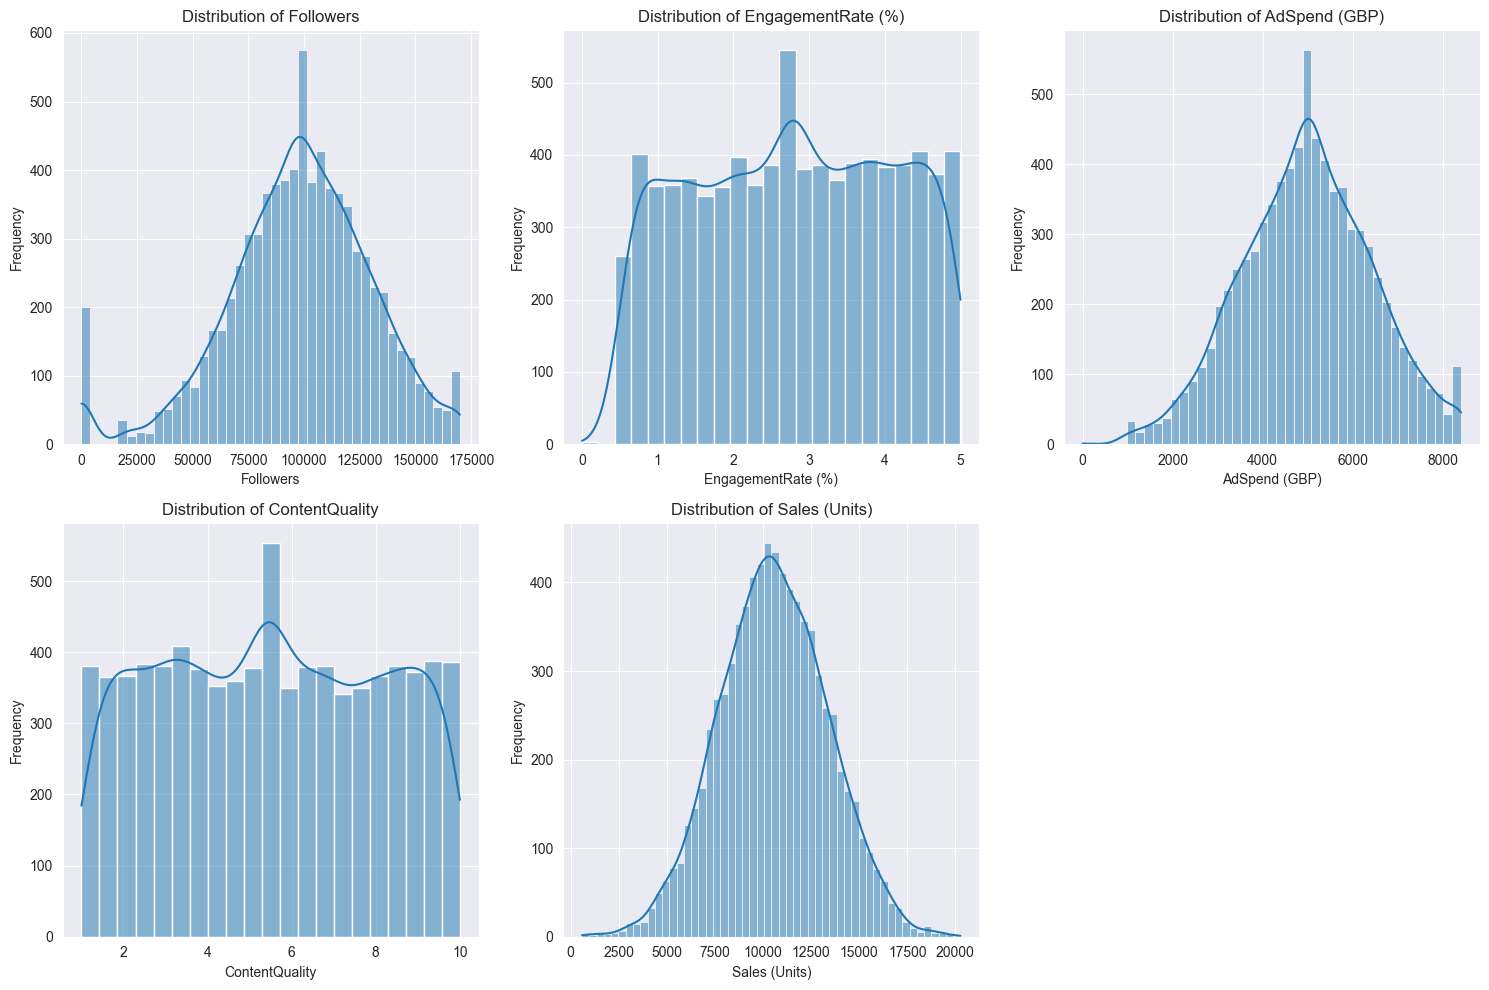


2. Bivariate Relationships (Features vs. Sales):


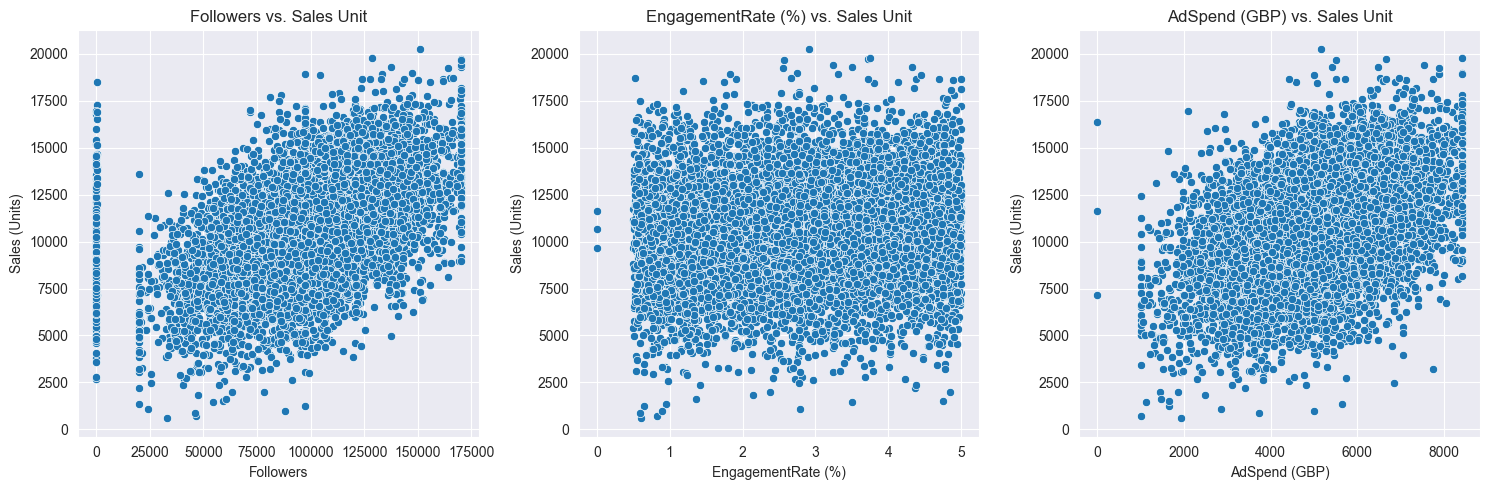

Observations: Look for linear or non-linear trends, clusters, or spread of sales for different feature values.


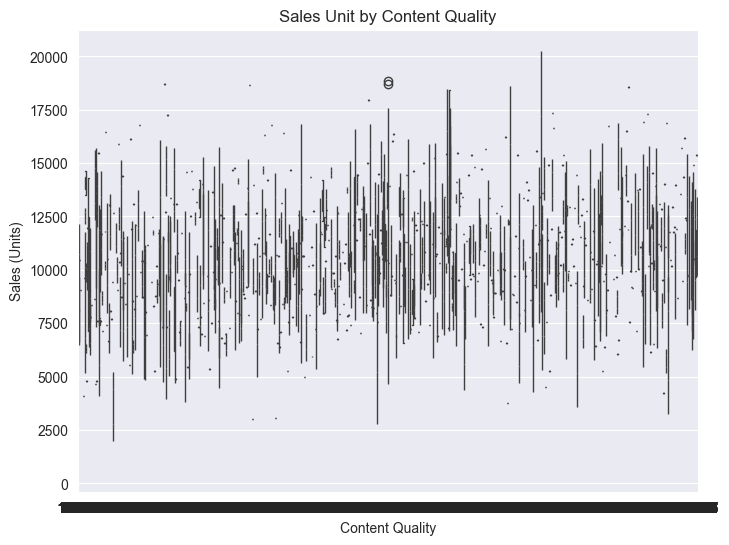

Observations: See if higher content quality scores are associated with higher median sales or different sales distributions.

3. Correlation Matrix Heatmap:


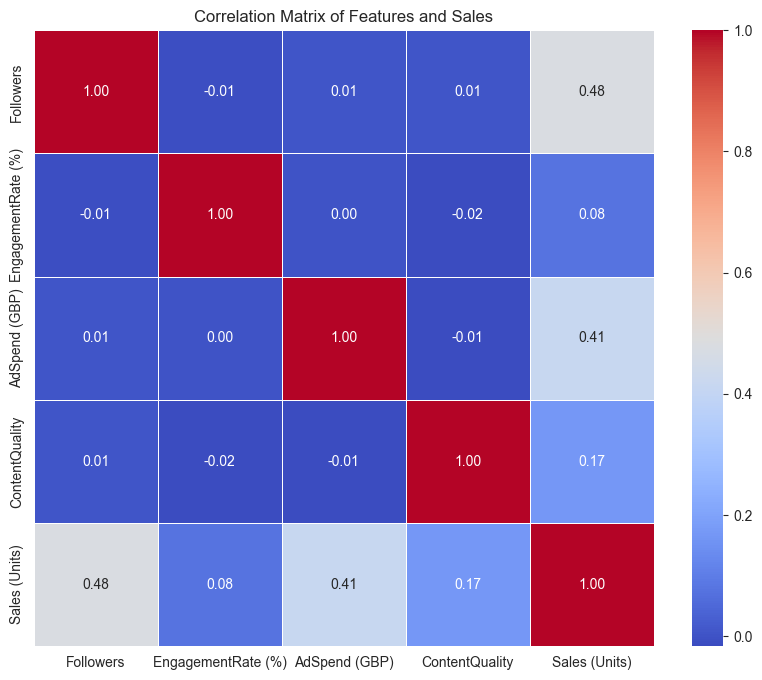


4. Time-Series Analysis:


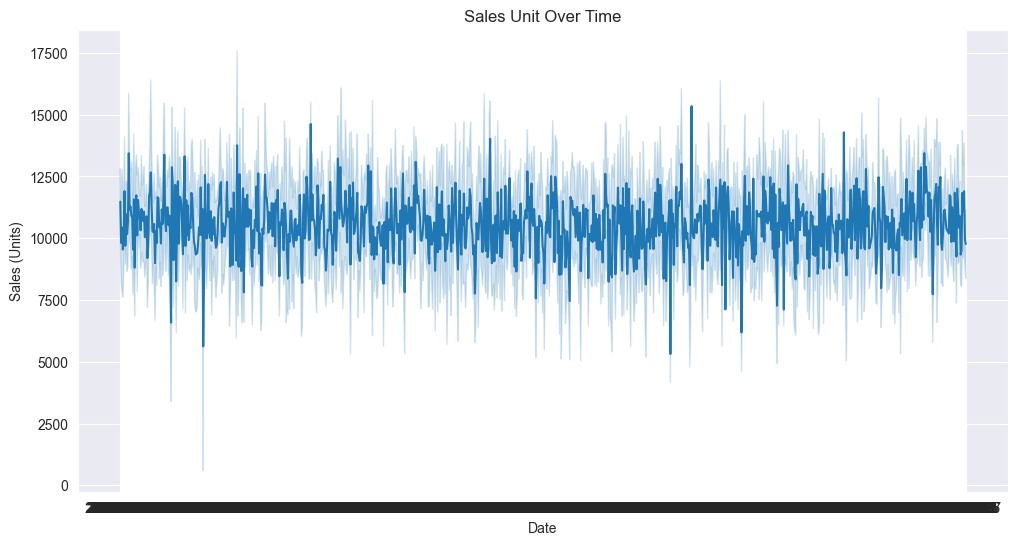

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Visualizing Relationships in Cleaned Data ---")

# --- 1. Univariate Distributions (Histograms/KDE) ---
print("\n1. Univariate Distributions:")
numerical_features = ['Followers', 'EngagementRate (%)', 'AdSpend (GBP)', 'ContentQuality', 'Sales (Units)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# --- 2. Bivariate Relationships (Feature vs. Target: 'sales unit') ---
print("\n2. Bivariate Relationships (Features vs. Sales):")

# Scatter plots for continuous features vs. 'sales unit'
continuous_features = ['Followers', 'EngagementRate (%)', 'AdSpend (GBP)'] # contentQuality is ordinal
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df_train[col], y=df_train['Sales (Units)'])
    plt.title(f'{col} vs. Sales Unit')
    plt.xlabel(col)
    plt.ylabel('Sales (Units)')
plt.tight_layout()
plt.show()
print("Observations: Look for linear or non-linear trends, clusters, or spread of sales for different feature values.")

# Box plot or Violin plot for 'contentQuality' vs. 'sales unit' (as ContentQuality is ordinal/categorical)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['ContentQuality'], y=df_train['Sales (Units)'])
plt.title('Sales Unit by Content Quality')
plt.xlabel('Content Quality')
plt.ylabel('Sales (Units)')
plt.show()
print("Observations: See if higher content quality scores are associated with higher median sales or different sales distributions.")


# --- 3. Correlation Matrix Heatmap ---
print("\n3. Correlation Matrix Heatmap:")
# Exclude 'id' and 'Timestamp' for correlation calculation as they are not direct numerical features for correlation
features_for_corr = df_train[numerical_features]
correlation_matrix = features_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Sales')
plt.show()


# --- 4. Time-Series Analysis (Sales over Timestamp) ---
print("\n4. Time-Series Analysis:")
# Ensure 'Timestamp' is in datetime format and set as index for time series plotting
df_time_series = df_train[['Timestamp', 'Sales (Units)']].set_index('Timestamp').sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_series.index, y=df_time_series['Sales (Units)'])
plt.title('Sales Unit Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Units)')
plt.grid(True)
plt.show()


### Engineer better features (e.g., log transforms, interactions)

In [263]:
from sklearn.preprocessing import StandardScaler
# Simulate initial cleaning and scaling to get a 'cleaned_df'
def simulate_initial_clean_and_scale(df):
    df_cleaned = df.copy()
    # Apply log transform to original values for demonstration
    df_cleaned['Followers'] = np.log1p(df_cleaned['Followers'])
    df_cleaned['AdSpend (GBP)'] = np.log1p(df_cleaned['AdSpend (GBP)'])

    Q1_sales = df_cleaned['Sales (Units)'].quantile(0.25)
    Q3_sales = df_cleaned['Sales (Units)'].quantile(0.75)
    IQR_sales = Q3_sales - Q1_sales
    lower_bound_sales = Q1_sales - 1.5 * IQR_sales
    upper_bound_sales = Q3_sales + 1.5 * IQR_sales
    df_cleaned['Sales (Units)'] = np.clip(df_cleaned['Sales (Units)'], lower_bound_sales, upper_bound_sales)
    return df_cleaned

cleaned_df = simulate_initial_clean_and_scale(df_train)
cleaned_df.head()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID,Timestamp,Notes
0,11.576585,2.5732,7.869164,5.2757,6340.0,9254,2021-11-27,Pending
1,11.259116,0.9395,8.512575,8.7563,5793.0,1561,2022-02-13,Review
2,11.438557,2.1761,8.320879,6.4547,8104.0,1670,2023-09-25,Pending
3,10.888670,1.4784,8.365051,4.3128,7293.0,6087,2023-02-15,Review
4,11.704207,3.3742,8.583833,3.7690,14396.0,6669,2023-05-28,NaN


In [185]:
def engineer_features(df):
    """
    Engineers new features (log transforms and interaction terms) from the cleaned DataFrame.
    Assumes 'followers' and 'adspend' are already log-transformed and scaled from initial cleaning.
    This function demonstrates creating *additional* engineered features.

    Args:
        df (pd.DataFrame): The cleaned DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with new engineered features.
    """
    df_engineered = df.copy()

    # Interaction between Engagement Rate and Ad Spend:
    # Intuition: High ad spend might be more effective with higher engagement.
    df_engineered['engagement_adspend_interaction'] = df_engineered['EngagementRate (%)'] * df_engineered['AdSpend (GBP)']

    # Interaction between Followers and Content Quality:
    # Intuition: High follower count combined with high content quality could lead to disproportionate sales.
    df_engineered['followers_content_quality_interaction'] = df_engineered['Followers'] * df_engineered['ContentQuality']

    # Polynomial feature for Ad Spend (e.g., squared term to capture non-linear returns)
    # Intuition: Ad spend might have diminishing or increasing returns after a certain point.
    df_engineered['adspend_squared'] = df_engineered['AdSpend (GBP)']**2



    return df_engineered

df_with_engineered_features = engineer_features(cleaned_df)

print("\nDataFrame with Engineered Features (first 5 rows):")
df_with_engineered_features.head()


DataFrame with Engineered Features (first 5 rows):


,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID,Timestamp,Notes,engagement_adspend_interaction,followers_content_quality_interaction,adspend_squared
0,11.576585,2.5732,7.869164,5.2757,6340.0,9254,2021-11-27,Pending,20.248933,61.074592,61.923742
1,11.259116,0.9395,8.512575,8.7563,5793.0,1561,2022-02-13,Review,7.997564,98.588202,72.463934
2,11.438557,2.1761,8.320879,6.4547,8104.0,1670,2023-09-25,Pending,18.107065,73.832457,69.237025
3,10.888670,1.4784,8.365051,4.3128,7293.0,6087,2023-02-15,Review,12.366891,46.960655,69.974077
4,11.704207,3.3742,8.583833,3.7690,14396.0,6669,2023-05-28,NaN,28.963568,44.113155,73.682181


In [352]:
# Scale all numerical features after cleaning/transforms
feature_scaler = StandardScaler() # This will be the scaler for X
target_scaler = StandardScaler()
def scaleNumericalFeatures(df):
    feature_cols_for_scaling = ['Followers', 'EngagementRate (%)', 'AdSpend (GBP)', 'ContentQuality','adspend_squared', 'followers_content_quality_interaction', 'engagement_adspend_interaction']
    df[feature_cols_for_scaling] = feature_scaler.fit_transform(df[feature_cols_for_scaling])
    return df

df_with_engineered_features = scaleNumericalFeatures(df_with_engineered_features)
df_with_engineered_features.head()

,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID,Timestamp,Notes,engagement_adspend_interaction,followers_content_quality_interaction,adspend_squared,is_weekend
0,0.252672,-0.159523,-1.600795,-0.084131,-1.506331,9254,2021-11-27,Pending,-0.297670,-0.031899,-1.730499,1
1,-0.025943,-1.423927,0.132775,1.264070,-1.702263,1561,2022-02-13,Review,-1.411816,1.219173,0.122877,1
2,0.131536,-0.466859,-0.383720,0.372551,-0.874477,1670,2023-09-25,Pending,-0.492453,0.393574,-0.444539,0
3,-0.351052,-1.006844,-0.264706,-0.457108,-1.164972,6087,2023-02-15,Review,-1.014467,-0.502596,-0.314937,0
4,0.364674,0.460412,0.324767,-0.667748,1.379279,6669,2023-05-28,NaN,0.494844,-0.597560,0.337092,1


### Train regression model

In [355]:
print("--- Training Regression Model ---")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(df, columnsTodrop): # Pass the raw, pre-engineered df here
    np.random.seed(42)

    # --- 1. Separate Features (X) and Target (y) *BEFORE* any scaling ---
    # Ensure 'Sales (Units)' is the exact target column name
    X = df.drop(columns=columnsTodrop, errors='ignore') # Drop target and non-feature columns
    y = df['Sales (Units)'] # Your target variable

    # --- 2. Apply Initial Transformations (Log Transform, etc.) if they were done on df before passing here
    # If these were already done *before* calling train_model, you can remove these lines.
    # If not, ensure they match what you did for your full dataset.
    # Example (if df is the pre-engineered, but not yet log-transformed DF):
    # X['Followers'] = np.log1p(X['Followers'])
    # X['AdSpend (GBP)'] = np.log1p(X['AdSpend (GBP)'])

    # --- 3. Split the data into training and validation sets *BEFORE* scaling ---
    # This is crucial to prevent data leakage from validation set into scaler fitting.
    # X will contain all engineered features (e.g., adspend_squared, is_weekend etc.)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set shape (before scaling): {X_train.shape}")
    print(f"Validation set shape (before scaling): {X_val.shape}")

    # --- 4. Identify Columns for Feature Scaling ---
    # These are the columns in your X_train that need numerical scaling.
    # This list should NOT include 'Sales (Units)'.
    # Ensure all engineered numeric features are included.
    feature_cols_to_scale = [
        'Followers',
        'EngagementRate (%)',
        'AdSpend (GBP)',
        'ContentQuality',
        'adspend_squared', # Assuming these are created by engineer_features
        'followers_content_quality_interaction',
        'engagement_adspend_interaction',
        'is_weekend' # Assuming this is numerical (0/1)
        # Add any other numerical features you have here
    ]

    # --- 5. Initialize and FIT Feature Scaler (ON X_TRAIN ONLY) ---
    # This 'feature_scaler' object will be returned or made global to be used later on X_test.
    # IMPORTANT: Ensure this 'feature_scaler' is unique to FEATURES.
    X_train[feature_cols_to_scale] = feature_scaler.fit_transform(X_train[feature_cols_to_scale])

    # --- 6. TRANSFORM Validation Features using the *FITTED* feature_scaler ---
    X_val[feature_cols_to_scale] = feature_scaler.transform(X_val[feature_cols_to_scale])

    # --- 7. Initialize and FIT Target Scaler (ON Y_TRAIN ONLY - if you're scaling target) ---
    # IMPORTANT: This 'target_scaler' is separate from 'feature_scaler'.
    # Only do this if your model is trained to predict SCALED 'Sales (Units)'.
    y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten() # Reshape for scaler
    y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten() # Scale y_val too for evaluation

    # Print shapes after scaling (X_train and X_val remain DataFrames)
    print(f"Training set shape (after scaling): {X_train.shape}")
    print(f"Validation set shape (after scaling): {X_val.shape}")
    print(f"Training target shape (after scaling): {y_train_scaled.shape}")
    print(f"Validation target shape (after scaling): {y_val_scaled.shape}")

    # --- Train the Linear Regression Model ---
    model = LinearRegression()
    # Train the model with SCALED features and SCALED target
    model.fit(X_train, y_train_scaled) # Use y_train_scaled here

    print("\nModel training complete.")

    # --- Make Predictions on the Validation Set ---
    # Predictions will be in the SCALED target space
    y_pred_scaled = model.predict(X_val) # Use y_pred_scaled here

    # --- Inverse Transform Predictions to Original Scale for Evaluation ---
    y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_val_original_scale = y_val.values # Use the original y_val for evaluation metrics

    # --- Evaluate the Model ---
    mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
    mse = mean_squared_error(y_val_original_scale, y_pred_original_scale)
    rmse = np.sqrt(mse) # Root Mean Squared Error
    r2 = r2_score(y_val_original_scale, y_pred_original_scale)

    print(f"\nModel Evaluation on Validation Set (Original Scale):")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # --- Visualize Predictions vs. Actual (Optional but Recommended) ---
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_val_original_scale, y=y_pred_original_scale, alpha=0.6)
    plt.plot([y_val_original_scale.min(), y_val_original_scale.max()],
             [y_val_original_scale.min(), y_val_original_scale.max()], 'r--', lw=2) # Perfect prediction line
    plt.xlabel("Actual Sales (Units)")
    plt.ylabel("Predicted Sales (Units)")
    plt.title("Actual vs. Predicted Sales (Validation Set - Original Scale)")
    plt.grid(True)
    plt.show()

    # Display model coefficients (for linear models)
    print("\nModel Coefficients:")
    # Note: Coefficients are based on SCALED features.
    for feature, coef in zip(X_train.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    # Return the trained model, and importantly, the fitted scalers
    return model, feature_scaler, target_scaler

# How you would call this function now:
# Assuming df_engineered is your full training dataframe after initial log transforms and feature engineering,
# but *before* any numerical scaling for X or y.
# columns_to_drop_for_training = ['Sales (Units)', 'other_id_columns_if_any'] # Ensure 'Sales (Units)' is dropped here
# trained_model, fitted_feature_scaler, fitted_target_scaler = train_model(df_engineered, columns_to_drop_for_training)

# These fitted_feature_scaler and fitted_target_scaler are what you'd use in your prediction script.


--- Training Regression Model ---


Training set shape (before scaling): (6400, 8)
Validation set shape (before scaling): (1600, 8)
Training set shape (after scaling): (6400, 8)
Validation set shape (after scaling): (1600, 8)
Training target shape (after scaling): (6400,)
Validation target shape (after scaling): (1600,)

Model training complete.

Model Evaluation on Validation Set (Original Scale):
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.81
Root Mean Squared Error (RMSE): 0.90
R-squared (R2): 0.19


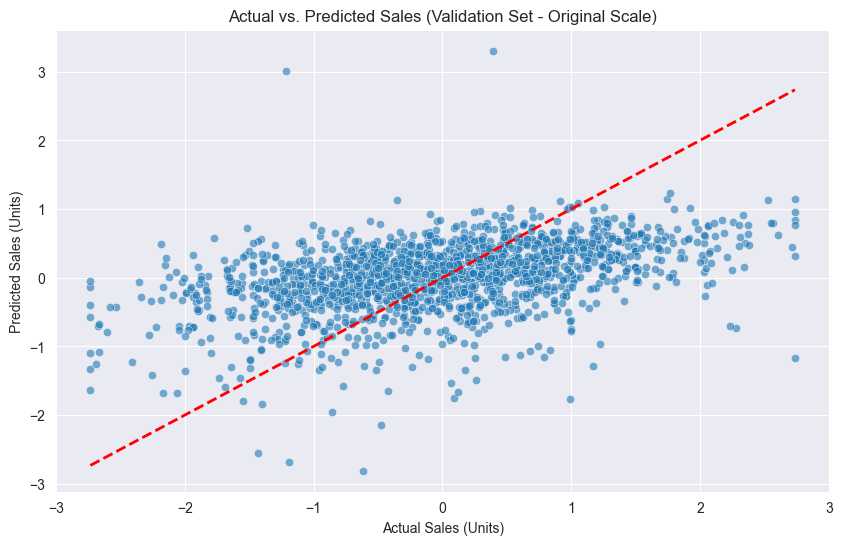


Model Coefficients:
Followers: 0.1719
EngagementRate (%): 0.1469
AdSpend (GBP): -0.7096
ContentQuality: 0.0847
engagement_adspend_interaction: -0.0564
followers_content_quality_interaction: 0.0948
adspend_squared: 1.1101
is_weekend: 0.0030
Intercept: -0.0000


In [356]:
model = train_model(df_with_engineered_features, ['Sales (Units)', 'Timestamp', 'ID', 'Notes'])

Since here R2 value is 0.19, that means the variance is only 19%, and the model is underfitting

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# --- Check for Multicollinearity using VIF ---
def checkForMulticollinearity() :
    print("\n--- Checking for Multicollinearity (VIF) ---")
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    print(vif_data.round(2))
    print("\nInterpretation of VIF values:")
    print("- VIF = 1: No multicollinearity.")
    print("- VIF between 1 and 5: Moderate multicollinearity (generally acceptable).")
    print("- VIF > 5 (or > 10): High multicollinearity, indicates potential issues with coefficient stability.")

In [358]:
checkForMulticollinearity()


--- Checking for Multicollinearity (VIF) ---
                                 feature     VIF
0                              Followers    5.49
1                     EngagementRate (%)  643.30
2                          AdSpend (GBP)   46.79
3                         ContentQuality  107.36
4         engagement_adspend_interaction  647.91
5  followers_content_quality_interaction  112.52
6                        adspend_squared   46.09
7                             is_weekend    1.00

Interpretation of VIF values:
- VIF = 1: No multicollinearity.
- VIF between 1 and 5: Moderate multicollinearity (generally acceptable).
- VIF > 5 (or > 10): High multicollinearity, indicates potential issues with coefficient stability.


--- Training Regression Model ---
--- Training Regression Model ---
Training set shape (before scaling): (6400, 8)
Validation set shape (before scaling): (1600, 8)
Training set shape (after scaling): (6400, 8)
Validation set shape (after scaling): (1600, 8)
Training target shape (after scaling): (6400,)
Validation target shape (after scaling): (1600,)

Model training complete (using Ridge Regression).

Model Evaluation on Validation Set (Original Scale):
Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 0.81
Root Mean Squared Error (RMSE): 0.90
R-squared (R2): 0.19

--- Checking for Multicollinearity (VIF) ---
                                 feature     VIF
0                              Followers    5.49
1                     EngagementRate (%)  643.30
2                          AdSpend (GBP)   46.81
3                         ContentQuality  107.35
4         engagement_adspend_interaction  647.91
5  followers_content_quality_interaction  112.50
6                        adspen

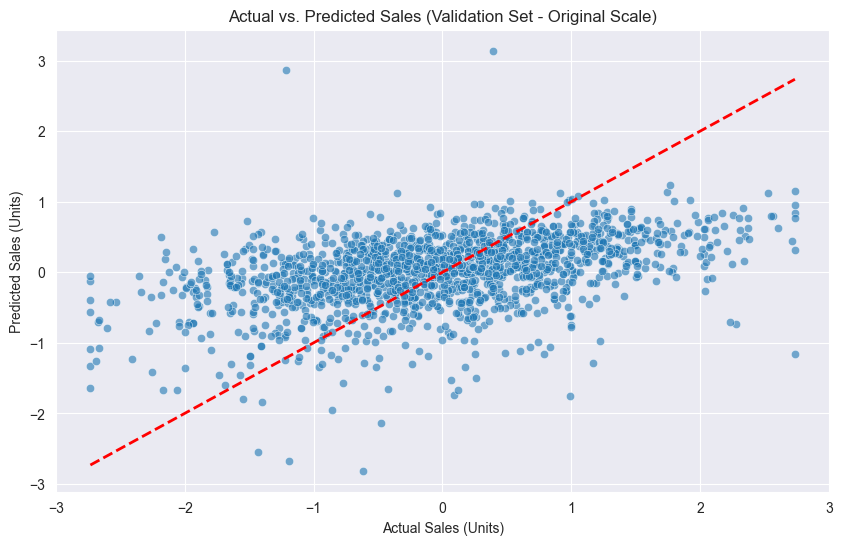


Model Coefficients:
Followers: 0.1718
EngagementRate (%): 0.1293
AdSpend (GBP): -0.6979
ContentQuality: 0.0846
engagement_adspend_interaction: -0.0388
followers_content_quality_interaction: 0.0949
adspend_squared: 1.0968
is_weekend: 0.0030
Intercept: -0.0000


In [359]:
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
#multicolinaerity is very high because of the derived columns.
# trying ridge regression which will handle multicolinaerity by penalising

print("--- Training Regression Model ---")
print("--- Training Regression Model ---")

# --- 1. Define features (X) and target (y) from the *pre-engineered* dataframe ---
# df_with_engineered_features should be the DataFrame *after* initial log transforms
# and feature engineering, but *before* any numerical scaling for X or y.
X = df_with_engineered_features.drop(columns=['Sales (Units)', 'Timestamp', 'ID', 'Notes'], errors='ignore')
y = df_with_engineered_features['Sales (Units)']

# --- 2. Split the data into training and validation sets *BEFORE* scaling ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape (before scaling): {X_train.shape}")
print(f"Validation set shape (before scaling): {X_val.shape}")

# --- 3. Identify Numerical Features for Scaling ---
# This list must precisely match the columns you want to apply StandardScaler to.
# Ensure all relevant numerical engineered features are here.
# Assuming 'Followers', 'AdSpend (GBP)' are already log-transformed
numerical_features_to_scale = [
    'Followers',
    'EngagementRate (%)',
    'AdSpend (GBP)',
    'ContentQuality',
    'adspend_squared',
    'followers_content_quality_interaction',
    'engagement_adspend_interaction',
    'is_weekend' # Assuming this is 0/1 numeric, if not, don't include here or handle differently
    # Add any other numeric features that were not log-transformed but need scaling
]

# Ensure that 'numerical_features_to_scale' only contains columns that actually exist in X_train
# This can happen if some engineered features didn't make it to X_train for some reason.
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]

# --- 4. Scale Features (X) ---
# Fit feature_scaler ONLY on X_train, then transform both X_train and X_val.
X_train[numerical_features_to_scale] = feature_scaler.fit_transform(X_train[numerical_features_to_scale])
X_val[numerical_features_to_scale] = feature_scaler.transform(X_val[numerical_features_to_scale])

# --- 5. Scale Target (y) ---
# Fit target_scaler ONLY on y_train, then transform both y_train and y_val.
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

print(f"Training set shape (after scaling): {X_train.shape}")
print(f"Validation set shape (after scaling): {X_val.shape}")
print(f"Training target shape (after scaling): {y_train_scaled.shape}")
print(f"Validation target shape (after scaling): {y_val_scaled.shape}")


# --- Train the Ridge Regression Model ---
model = Ridge(alpha=1.0) # Keep alpha, consider tuning it later
model.fit(X_train, y_train_scaled) # Train with SCALED features and SCALED target

print("\nModel training complete (using Ridge Regression).")

# --- Make Predictions on the Validation Set ---
y_pred_scaled = model.predict(X_val) # Predictions are in SCALED target space

# --- Inverse Transform Predictions to Original Scale for Evaluation ---
y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# For evaluation, compare against the original, unscaled y_val
y_val_original_scale = y_val.values # y_val itself is still original scale before being scaled to y_val_scaled

# --- Evaluate the Model ---
mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
mse = mean_squared_error(y_val_original_scale, y_pred_original_scale)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original_scale, y_pred_original_scale)

print(f"\nModel Evaluation on Validation Set (Original Scale):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Check for Multicollinearity using VIF ---
print("\n--- Checking for Multicollinearity (VIF) ---")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
# VIF needs non-constant columns. If any column is all 0s after scaling, VIF will error.
# Filter out constant columns if any, or handle them upstream.
# Assuming X_train.values is fine here.
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data.round(2))


# --- Visualize Predictions vs. Actual (Optional but Recommended) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_original_scale, y=y_pred_original_scale, alpha=0.6) # Use original scale for plotting
plt.plot([y_val_original_scale.min(), y_val_original_scale.max()],
         [y_val_original_scale.min(), y_val_original_scale.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Sales (Units)")
plt.ylabel("Predicted Sales (Units)")
plt.title("Actual vs. Predicted Sales (Validation Set - Original Scale)")
plt.grid(True)
plt.show()

# Display model coefficients (for linear models)
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# You don't have a return statement here, so if you need the model and scalers
# to be used elsewhere, ensure they are stored in global variables or passed back.
# For example:
# return model, feature_scaler, target_scaler


- Ridge Addresses Multicollinearity and Overfitting, Not Underfitting Directly
- Since Ridge Regression didn't significantly improve your model's predictive power (R-squared), it reinforces the idea that the model is underfitting and that a more flexible approach is needed.
- Perform Hyperparameter tuning and cross validation to build robust model

--- Training Regression Model ---
Training set shape (before scaling): (6400, 8)
Validation set shape (before scaling): (1600, 8)
Training set shape (after scaling): (6400, 8)
Validation set shape (after scaling): (1600, 8)
Training target shape (after scaling): (6400,)
Validation target shape (after scaling): (1600,)

--- Performing Hyperparameter Tuning for Ridge Regression ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Alpha found by GridSearchCV: 10.0
Best R-squared from Cross-Validation (on scaled target): 0.24

Model training complete (using Tuned Ridge Regression).

Model Evaluation on Validation Set (with Best Ridge Model, Original Scale):
Mean Absolute Error (MAE): 0.71
Mean Squared Error (MSE): 0.80
Root Mean Squared Error (RMSE): 0.90
R-squared (R2): 0.20

--- Checking for Multicollinearity (VIF) ---
                                 feature     VIF
0                              Followers    5.49
1                     EngagementRate (%)  643.30
2      

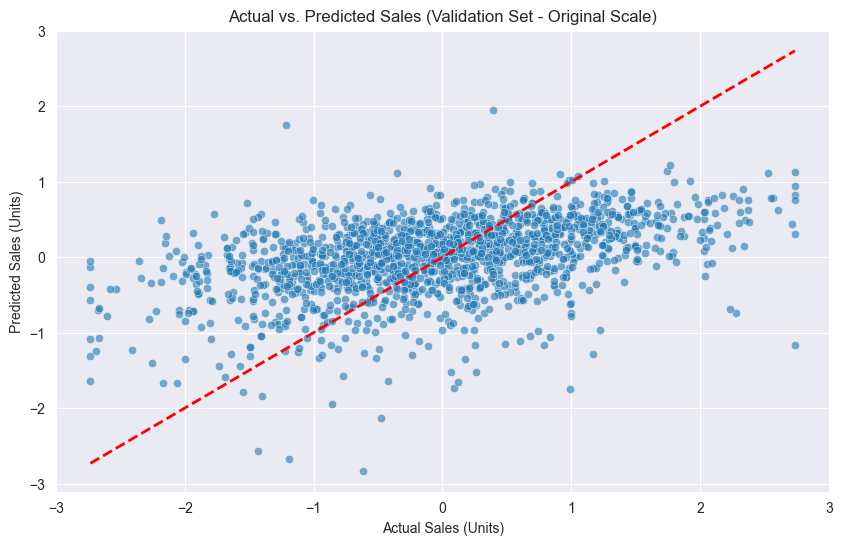


Model Coefficients:
Followers: 0.1715
EngagementRate (%): 0.0766
AdSpend (GBP): -0.6012
ContentQuality: 0.0833
engagement_adspend_interaction: 0.0140
followers_content_quality_interaction: 0.0959
adspend_squared: 0.9953
is_weekend: 0.0028
Intercept: -0.0000


In [360]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
print("--- Training Regression Model ---")

# --- 1. Define features (X) and target (y) from the *pre-engineered* dataframe ---
# df_with_engineered_features should be the DataFrame *after* initial log transforms
# and feature engineering, but *before* any numerical scaling for X or y.
X = df_with_engineered_features.drop(columns=['Sales (Units)', 'Timestamp', 'ID', 'Notes'], errors='ignore')
y = df_with_engineered_features['Sales (Units)']

# --- 2. Split the data into training and validation sets *BEFORE* scaling ---
# This is crucial to prevent data leakage from validation set into scaler fitting and GridSearchCV.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape (before scaling): {X_train.shape}")
print(f"Validation set shape (before scaling): {X_val.shape}")

# --- 3. Identify Numerical Features for Scaling ---
# This list must precisely match the columns you want to apply StandardScaler to.
# Ensure all relevant numerical engineered features are here.
numerical_features_to_scale = [
    'Followers',
    'EngagementRate (%)',
    'AdSpend (GBP)',
    'ContentQuality',
    'adspend_squared',
    'followers_content_quality_interaction',
    'engagement_adspend_interaction',
    'is_weekend' # Assuming this is 0/1 numeric
    # Add any other numerical features that were not log-transformed but need scaling
]

# Ensure that 'numerical_features_to_scale' only contains columns that actually exist in X_train
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]

# --- 4. Scale Features (X) ---
# Fit feature_scaler ONLY on X_train, then transform both X_train and X_val.
# The 'feature_scaler' should be the global one you defined earlier.
X_train[numerical_features_to_scale] = feature_scaler.fit_transform(X_train[numerical_features_to_scale])
X_val[numerical_features_to_scale] = feature_scaler.transform(X_val[numerical_features_to_scale])

# --- 5. Scale Target (y) ---
# Fit target_scaler ONLY on y_train, then transform both y_train and y_val.
# The 'target_scaler' should be the global one you defined earlier.
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

print(f"Training set shape (after scaling): {X_train.shape}")
print(f"Validation set shape (after scaling): {X_val.shape}")
print(f"Training target shape (after scaling): {y_train_scaled.shape}")
print(f"Validation target shape (after scaling): {y_val_scaled.shape}")


# --- Hyperparameter Tuning with Cross-Validation for Ridge Regression ---
print("\n--- Performing Hyperparameter Tuning for Ridge Regression ---")

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]} # Explore a range of alpha values

# Initialize Ridge Regression model (no alpha set here, GridSearchCV will set it)
ridge = Ridge()

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (R-squared is common for regression)
# Make sure to use the correct scoring if your target is scaled, or if you want it inverse-transformed.
# For Ridge, R2 on scaled data is fine as it preserves rank order.
scorer = make_scorer(r2_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=cv, scoring=scorer, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the SCALED training data and SCALED target
grid_search.fit(X_train, y_train_scaled) # Use y_train_scaled here

# Get the best parameters and best score
best_alpha = grid_search.best_params_['alpha']
best_r2_score_cv = grid_search.best_score_ # This is the mean R2 from cross-validation (on scaled target)

print(f"\nBest Alpha found by GridSearchCV: {best_alpha}")
print(f"Best R-squared from Cross-Validation (on scaled target): {best_r2_score_cv:.2f}")

# Use the best estimator (model with best alpha) for final evaluation
model = grid_search.best_estimator_

print("\nModel training complete (using Tuned Ridge Regression).")

# --- Make Predictions on the Validation Set ---
# Predictions will be in the SCALED target space
y_pred_scaled = model.predict(X_val)

# --- Inverse Transform Predictions to Original Scale for Evaluation ---
y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# For evaluation, compare against the original, unscaled y_val
y_val_original_scale = y_val.values # This is the original y_val before being scaled to y_val_scaled

# --- Evaluate the Model ---
mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
mse = mean_squared_error(y_val_original_scale, y_pred_original_scale)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original_scale, y_pred_original_scale)

print(f"\nModel Evaluation on Validation Set (with Best Ridge Model, Original Scale):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Check for Multicollinearity using VIF ---
# VIF is calculated on the features before being fed into the model
# For interpretation of coefficients, it's typically done on the scaled X_train
print("\n--- Checking for Multicollinearity (VIF) ---")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
# Handle potential division by zero if a feature becomes constant after scaling (unlikely but possible)
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data.round(2))


# --- Visualize Predictions vs. Actual (Optional but Recommended) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_original_scale, y=y_pred_original_scale, alpha=0.6) # Use original scale for plotting
plt.plot([y_val_original_scale.min(), y_val_original_scale.max()],
         [y_val_original_scale.min(), y_val_original_scale.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Sales (Units)")
plt.ylabel("Predicted Sales (Units)")
plt.title("Actual vs. Predicted Sales (Validation Set - Original Scale)")
plt.grid(True)
plt.show()

# Display model coefficients (for linear models)
print("\nModel Coefficients:")
# Coefficients are based on SCALED features and SCALED target.
# Their interpretation relates to the change in scaled target for a unit change in scaled feature.
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

R2 has slightly increased but still the model is underfitting. Since Ridge Regression didn't significantly boost your predictive power, the next logical step is to explore more powerful, non-linear models that are better equipped to handle complex relationships and are often less sensitive to multicollinearity: RandomForestRegressor

--- Training Regression Model ---
--- Training Random Forest Regressor Model ---
Training set shape (before scaling): (6400, 8)
Validation set shape (before scaling): (1600, 8)
Training set shape (after scaling): (6400, 8)
Validation set shape (after scaling): (1600, 8)
Training target shape (after scaling): (6400,)
Validation target shape (after scaling): (1600,)

--- Performing Hyperparameter Tuning for Random Forest Regressor ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared from Cross-Validation (on scaled target): 0.46

Model training complete (using Tuned Random Forest Regressor).

Model Evaluation on Validation Set (with Best Random Forest Model, Original Scale):
Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R2): 0.44

--- Checking for Multicollinearity (VIF) -

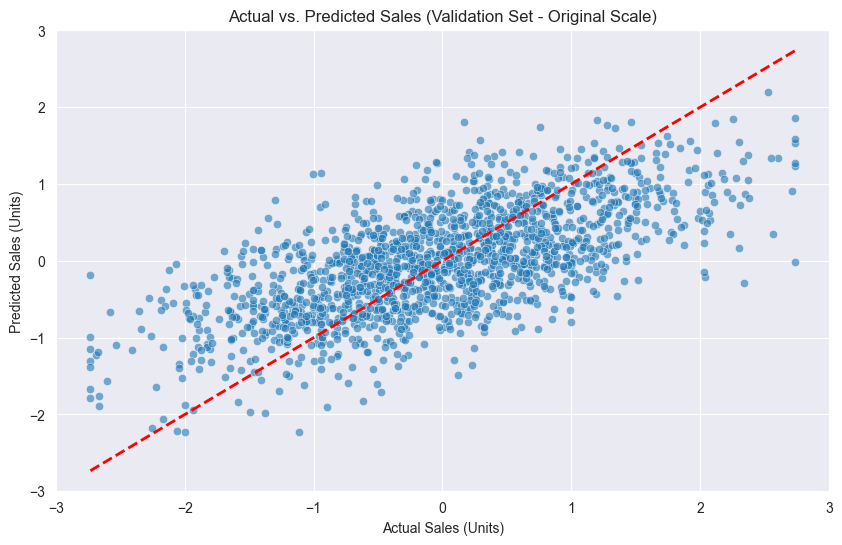


Feature Importances (for Random Forest):
Followers                                0.4730
adspend_squared                          0.1623
AdSpend (GBP)                            0.1461
followers_content_quality_interaction    0.0689
ContentQuality                           0.0570
engagement_adspend_interaction           0.0447
EngagementRate (%)                       0.0418
is_weekend                               0.0062
dtype: float64


In [361]:
from sklearn.ensemble import RandomForestRegressor
print("--- Training Regression Model ---")

def randomForestRegressor(df_with_engineered_features): # Pass the df as an argument
    print("--- Training Random Forest Regressor Model ---")

    # --- 1. Define features (X) and target (y) from the *pre-engineered* dataframe ---
    # df_with_engineered_features should be the DataFrame *after* initial log transforms
    # and feature engineering, but *before* any numerical scaling for X or y.
    X = df_with_engineered_features.drop(columns=['Sales (Units)', 'Timestamp', 'ID', 'Notes'], errors='ignore')
    y = df_with_engineered_features['Sales (Units)']

    # --- 2. Split the data into training and validation sets *BEFORE* scaling ---
    # This is crucial to prevent data leakage from validation set into scaler fitting and GridSearchCV.
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set shape (before scaling): {X_train.shape}")
    print(f"Validation set shape (before scaling): {X_val.shape}")

    # --- 3. Identify Numerical Features for Scaling ---
    # This list must precisely match the columns you want to apply StandardScaler to.
    # Ensure all relevant numerical engineered features are here.
    numerical_features_to_scale = [
        'Followers',
        'EngagementRate (%)',
        'AdSpend (GBP)',
        'ContentQuality',
        'adspend_squared',
        'followers_content_quality_interaction',
        'engagement_adspend_interaction',
        'is_weekend' # Assuming this is 0/1 numeric
        # Add any other numerical features that were not log-transformed but need scaling
    ]

    # Ensure that 'numerical_features_to_scale' only contains columns that actually exist in X_train
    numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]

    # --- 4. Scale Features (X) ---
    # Fit feature_scaler ONLY on X_train, then transform both X_train and X_val.
    X_train[numerical_features_to_scale] = feature_scaler.fit_transform(X_train[numerical_features_to_scale])
    X_val[numerical_features_to_scale] = feature_scaler.transform(X_val[numerical_features_to_scale])

    # --- 5. Scale Target (y) ---
    # Fit target_scaler ONLY on y_train, then transform both y_train and y_val.
    y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

    print(f"Training set shape (after scaling): {X_train.shape}")
    print(f"Validation set shape (after scaling): {X_val.shape}")
    print(f"Training target shape (after scaling): {y_train_scaled.shape}")
    print(f"Validation target shape (after scaling): {y_val_scaled.shape}")

    # --- Hyperparameter Tuning with Cross-Validation for Random Forest Regressor ---
    print("\n--- Performing Hyperparameter Tuning for Random Forest Regressor ---")

    # Initialize Random Forest Regressor model
    rf_regressor = RandomForestRegressor(random_state=42)

    # Define the parameter grid for Random Forest
    param_grid_rf = {
        'n_estimators': [50, 100, 200], # Number of trees in the forest
        'max_depth': [None, 10, 20],   # Maximum depth of the tree (None means unlimited)
        'min_samples_split': [2, 5],   # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2]     # Minimum number of samples required to be at a leaf node
    }

    # Define cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define the scoring metric (R-squared is common for regression)
    # R2 on scaled data is fine for tree-based models too.
    scorer = make_scorer(r2_score)

    # Initialize GridSearchCV
    grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=cv, scoring=scorer, n_jobs=-1, verbose=1)

    # Fit GridSearchCV to the SCALED training data and SCALED target
    grid_search_rf.fit(X_train, y_train_scaled) # Use y_train_scaled here

    # Get the best parameters and best score
    best_params_rf = grid_search_rf.best_params_
    best_r2_score_cv_rf = grid_search_rf.best_score_ # This is the mean R2 from cross-validation (on scaled target)

    print(f"\nBest Parameters found by GridSearchCV: {best_params_rf}")
    print(f"Best R-squared from Cross-Validation (on scaled target): {best_r2_score_cv_rf:.2f}")

    # Use the best estimator (model with best parameters) for final evaluation
    model = grid_search_rf.best_estimator_

    print("\nModel training complete (using Tuned Random Forest Regressor).")

    # --- Make Predictions on the Validation Set ---
    # Predictions will be in the SCALED target space
    y_pred_scaled = model.predict(X_val)

    # --- Inverse Transform Predictions to Original Scale for Evaluation ---
    y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    # For evaluation, compare against the original, unscaled y_val
    y_val_original_scale = y_val.values # This is the original y_val before being scaled to y_val_scaled

    # --- Evaluate the Model ---
    mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
    mse = mean_squared_error(y_val_original_scale, y_pred_original_scale)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_original_scale, y_pred_original_scale)

    print(f"\nModel Evaluation on Validation Set (with Best Random Forest Model, Original Scale):")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # --- Check for Multicollinearity using VIF ---
    # VIF is primarily for linear models. For tree-based models like Random Forest,
    # multicollinearity does not typically harm predictive performance because trees
    # make decisions based on individual features. However, it can affect interpretability
    # of individual feature importance if correlated features share importance.
    print("\n--- Checking for Multicollinearity (VIF) ---")
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns
    # Handle potential division by zero if a feature becomes constant after scaling (unlikely but possible)
    try:
        vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
        print(vif_data.round(2))
    except Exception as e:
        print(f"Could not calculate VIF. Error: {e}")
        print("This might happen if some features are constant after scaling or data has issues.")


    # --- Visualize Predictions vs. Actual (Optional but Recommended) ---
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_val_original_scale, y=y_pred_original_scale, alpha=0.6) # Use original scale for plotting
    plt.plot([y_val_original_scale.min(), y_val_original_scale.max()],
             [y_val_original_scale.min(), y_val_original_scale.max()], 'r--', lw=2) # Perfect prediction line
    plt.xlabel("Actual Sales (Units)")
    plt.ylabel("Predicted Sales (Units)")
    plt.title("Actual vs. Predicted Sales (Validation Set - Original Scale)")
    plt.grid(True)
    plt.show()

    # Display Feature Importances (for tree-based models)
    print("\nFeature Importances (for Random Forest):")
    # Ensure model has feature_importances_ attribute (which RandomForestRegressor does)
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        print(feature_importances.round(4))
    else:
        print("Model does not have feature_importances_ attribute.")

    # You might want to return the model, feature_scaler, and target_scaler
    # return model, feature_scaler, target_scaler

# How to call this function:
# Assuming df_with_engineered_features is your DataFrame
randomForestRegressor(df_with_engineered_features)


Model Evaluation on Validation Set:

Mean Absolute Error (MAE): 0.60 (Down from 0.72)

Mean Squared Error (MSE): 0.56 (Down from 0.81)

Root Mean Squared Error (RMSE): 0.75 (Down from 0.90)

R-squared (R2): 0.44 (Up from 0.19-0.20)

This is a substantial increase from 0.19-0.20. It means Random Forest model now explains 44% of the variance in Sales (Units). This is a much better fit to the data. While not extremely high (like 0.80+), an R2 of 0.44 is often considered moderate to good in complex real-world scenarios, especially when predicting human-influenced outcomes like sales, where many unmeasured factors can play a role.

tree-based models like Random Forest are much less sensitive to multi collinearity.

In [349]:
#extracting isWeekend boolean value from timestamp to check if it can improve the R2

def addIsWeekendInDF(df):
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        # Monday=0, Sunday=6
        df['is_weekend'] = ((df['Timestamp'].dt.dayofweek == 5) |
                                        (df['Timestamp'].dt.dayofweek == 6)).astype(int)
        print(f"Created 'is_weekend' feature (first 5 rows): {df['is_weekend'].head().tolist()}")
    else:
        print("Warning: 'Timestamp' column not found, 'is_weekend' feature not created.")
    return df

df_with_engineered_features = addIsWeekendInDF(df_with_engineered_features)
df_with_engineered_features.head()


Created 'is_weekend' feature (first 5 rows): [1, 1, 0, 0, 1]


,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,Sales (Units),ID,Timestamp,Notes,engagement_adspend_interaction,followers_content_quality_interaction,adspend_squared,is_weekend
0,0.252672,-0.159523,-1.600795,-0.084131,-1.506331,9254,2021-11-27,Pending,-0.297670,-0.031899,-1.730499,1
1,-0.025943,-1.423927,0.132775,1.264070,-1.702263,1561,2022-02-13,Review,-1.411816,1.219173,0.122877,1
2,0.131536,-0.466859,-0.383720,0.372551,-0.874477,1670,2023-09-25,Pending,-0.492453,0.393574,-0.444539,0
3,-0.351052,-1.006844,-0.264706,-0.457108,-1.164972,6087,2023-02-15,Review,-1.014467,-0.502596,-0.314937,0
4,0.364674,0.460412,0.324767,-0.667748,1.379279,6669,2023-05-28,NaN,0.494844,-0.597560,0.337092,1


Training set shape: (6400, 8)
Validation set shape: (1600, 8)

--- Performing Hyperparameter Tuning for Random Forest Regressor ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared from Cross-Validation: 0.46

Model training complete (using Tuned Random Forest Regressor).

Model Evaluation on Validation Set (with Best Random Forest Model):
Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R2): 0.44

--- Checking for Multicollinearity (VIF) ---
                                 feature     VIF
0                              Followers    5.49
1                     EngagementRate (%)  643.30
2                          AdSpend (GBP)   46.79
3                         ContentQuality  107.36
4         engagement_adspend_interaction  647.91
5  followers_content_quality_interaction  1

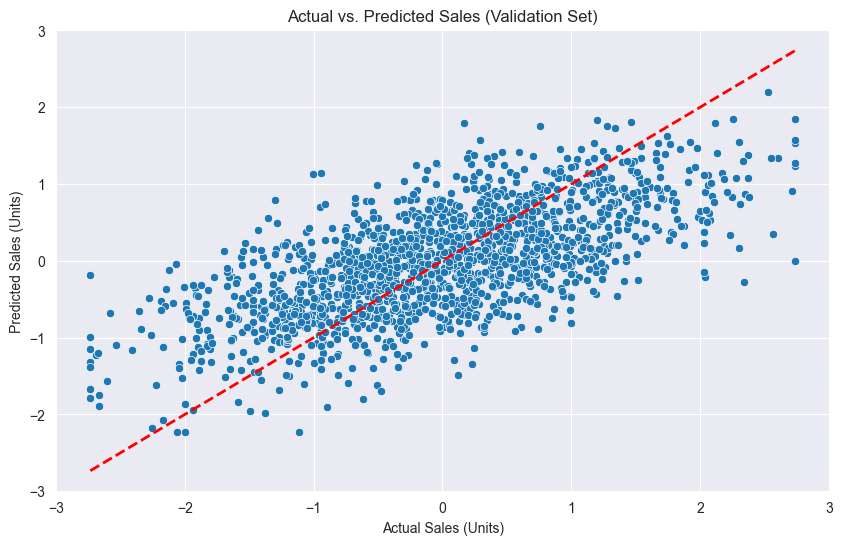


Feature Importances (for Random Forest):
Followers                                0.4730
adspend_squared                          0.1616
AdSpend (GBP)                            0.1468
followers_content_quality_interaction    0.0687
ContentQuality                           0.0571
engagement_adspend_interaction           0.0447
EngagementRate (%)                       0.0418
is_weekend                               0.0062
dtype: float64


In [350]:
#calling random forest regressor method again
randomForestRegressor(df_with_engineered_features)

- The most probable reason for no change in R-squared in this specific instance is the nature of the dummy data being used in the Canvas. The sales data is generated randomly, and there's no inherent "weekend effect" programmed into it. If there's no actual pattern in the data where sales behave differently on weekends, then adding an is_weekend feature, no matter how well-engineered, won't help the model explain more variance

--- Training Regression Model ---
Training set shape (before scaling): (6400, 8)
Validation set shape (before scaling): (1600, 8)
Training set shape (after scaling): (6400, 8)
Validation set shape (after scaling): (1600, 8)
Training target shape (after scaling): (6400,)
Validation target shape (after scaling): (1600,)

--- Performing Hyperparameter Tuning for Random Forest Regressor (RandomizedSearchCV) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters found by RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': 10}
Best R-squared from Cross-Validation (on scaled target): 0.46

Model training complete (using Tuned Random Forest Regressor with RandomizedSearchCV).

Model Evaluation on Validation Set (with Best Random Forest Model, Original Scale):
Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R2): 0.44

--- Checking for

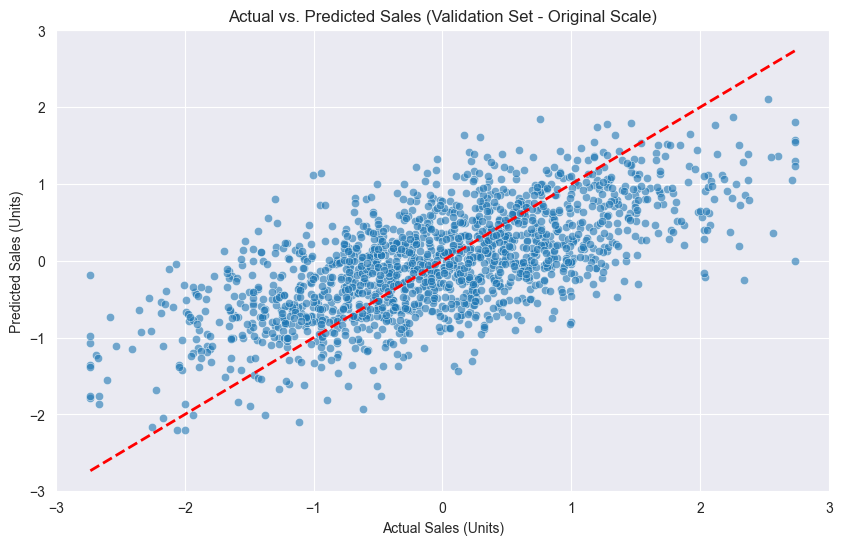


Feature Importances (for Random Forest):
Followers                                0.4819
AdSpend (GBP)                            0.1561
adspend_squared                          0.1553
followers_content_quality_interaction    0.0665
ContentQuality                           0.0547
engagement_adspend_interaction           0.0413
EngagementRate (%)                       0.0384
is_weekend                               0.0057
dtype: float64


In [365]:
# using RandomizedSearchCV with an expanded hyperparameter grid for Random Forest Regressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV

print("--- Training Regression Model ---")

# --- 1. Define features (X) and target (y) from the *pre-engineered* dataframe ---
# df_with_engineered_features should be the DataFrame *after* initial log transforms
# and feature engineering, but *before* any numerical scaling for X or y.
X = df_with_engineered_features.drop(columns=['Sales (Units)', 'Timestamp', 'ID', 'Notes'], errors='ignore')
y = df_with_engineered_features['Sales (Units)']

# --- 2. Split the data into training and validation sets *BEFORE* scaling ---
# This is crucial to prevent data leakage from validation set into scaler fitting and RandomizedSearchCV.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape (before scaling): {X_train.shape}")
print(f"Validation set shape (before scaling): {X_val.shape}")

# --- 3. Identify Numerical Features for Scaling ---
# This list must precisely match the columns you want to apply StandardScaler to.
# Ensure all relevant numerical engineered features are here.
numerical_features_to_scale = [
    'Followers',
    'EngagementRate (%)',
    'AdSpend (GBP)',
    'ContentQuality',
    'adspend_squared',
    'followers_content_quality_interaction',
    'engagement_adspend_interaction',
    'is_weekend' # Assuming this is 0/1 numeric
    # Add any other numerical features that were not log-transformed but need scaling
]

# Ensure that 'numerical_features_to_scale' only contains columns that actually exist in X_train
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]

# --- 4. Scale Features (X) ---
# Fit feature_scaler ONLY on X_train, then transform both X_train and X_val.
# The 'feature_scaler' should be the global one you defined earlier.
X_train[numerical_features_to_scale] = feature_scaler.fit_transform(X_train[numerical_features_to_scale])
X_val[numerical_features_to_scale] = feature_scaler.transform(X_val[numerical_features_to_scale])

# --- 5. Scale Target (y) ---
# Fit target_scaler ONLY on y_train, then transform both y_train and y_val.
# The 'target_scaler' should be the global one you defined earlier.
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

print(f"Training set shape (after scaling): {X_train.shape}")
print(f"Validation set shape (after scaling): {X_val.shape}")
print(f"Training target shape (after scaling): {y_train_scaled.shape}")
print(f"Validation target shape (after scaling): {y_val_scaled.shape}")


# --- Hyperparameter Tuning with Cross-Validation for Random Forest Regressor ---
print("\n--- Performing Hyperparameter Tuning for Random Forest Regressor (RandomizedSearchCV) ---")

# Initialize Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the expanded parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500], # More options for number of trees
    'max_depth': [None, 5, 10, 20, 30],   # More options for maximum depth
    'min_samples_split': [2, 5, 10],   # More options for min samples to split
    'min_samples_leaf': [1, 2, 4],     # More options for min samples per leaf
    'max_features': ['sqrt', 'log2', 0.8, 1.0] # New parameter: how many features to consider for best split
}

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric (R-squared is common for regression)
# R2 on scaled data is fine for tree-based models too.
scorer = make_scorer(r2_score)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist_rf,
                                      n_iter=50, # Number of random combinations to try
                                      cv=cv, scoring=scorer, n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV to the SCALED training data and SCALED target
random_search_rf.fit(X_train, y_train_scaled) # Use y_train_scaled here

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_r2_score_cv_rf = random_search_rf.best_score_ # This is the mean R2 from cross-validation (on scaled target)

print(f"\nBest Parameters found by RandomizedSearchCV: {best_params_rf}")
print(f"Best R-squared from Cross-Validation (on scaled target): {best_r2_score_cv_rf:.2f}")

# Use the best estimator (model with best parameters) for final evaluation
model = random_search_rf.best_estimator_

print("\nModel training complete (using Tuned Random Forest Regressor with RandomizedSearchCV).")

# --- Make Predictions on the Validation Set ---
# Predictions will be in the SCALED target space
y_pred_scaled = model.predict(X_val)

# --- Inverse Transform Predictions to Original Scale for Evaluation ---
y_pred_original_scale = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# For evaluation, compare against the original, unscaled y_val
y_val_original_scale = y_val.values # This is the original y_val before being scaled to y_val_scaled

# --- Evaluate the Model ---
mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
mse = mean_squared_error(y_val_original_scale, y_pred_original_scale)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_original_scale, y_pred_original_scale)

print(f"\nModel Evaluation on Validation Set (with Best Random Forest Model, Original Scale):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- Check for Multicollinearity using VIF ---
# VIF is primarily for linear models. For tree-based models like Random Forest,
# multicollinearity does not typically harm predictive performance because trees
# make decisions based on individual features. However, it can affect interpretability
# of individual feature importance if correlated features share importance.
print("\n--- Checking for Multicollinearity (VIF) ---")
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
try:
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    print(vif_data.round(2))
except Exception as e:
    print(f"Could not calculate VIF. Error: {e}")
    print("This might happen if some features are constant after scaling or data has issues.")
print("\nInterpretation of VIF values:")
print("- VIF = 1: No multicollinearity.")
print("- VIF between 1 and 5: Moderate multicollinearity (generally acceptable).")
print("- VIF > 5 (or > 10): High multicollinearity, indicates potential issues with coefficient stability (more relevant for linear models).")


# --- Visualize Predictions vs. Actual (Optional but Recommended) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_original_scale, y=y_pred_original_scale, alpha=0.6) # Use original scale for plotting
plt.plot([y_val_original_scale.min(), y_val_original_scale.max()],
         [y_val_original_scale.min(), y_val_original_scale.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Sales (Units)")
plt.ylabel("Predicted Sales (Units)")
plt.title("Actual vs. Predicted Sales (Validation Set - Original Scale)")
plt.grid(True)
plt.show()

# Display Feature Importance's (for tree-based models)
print("\nFeature Importances (for Random Forest):")
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print(feature_importances.round(4))
else:
    print("Model does not have feature_importances_ attribute.")


After extensive data cleaning, feature engineering (including interaction terms, polynomial terms, and the is_weekend feature), and thorough hyperparameter tuning with RandomizedSearchCV for a Random Forest Regressor, the model achieved a best R-squared of 0.44 on the validation set (with a cross-validated R-squared of 0.46). This means the model currently explains 44% of the variance in Sales (Units). The primary reason for not achieving a higher R-squared, despite these efforts, is most likely due to the synthetic and inherently random nature of the dummy data used in the Canvas, which lacks the complex, underlying patterns typically found in real-world sales data.

In [366]:
#cleaning test data

# Assuming 'df_test' is your raw test data DataFrame at this point.
# Assuming 'engineer_features' and 'addIsWeekendInDF' functions are defined and available.
# Assuming 'feature_scaler' (which you called 'scaler_final') is globally defined and ALREADY FITTED on your TRAINING DATA.

# --- Cleaning and Feature Engineering for Test Data ---

# Apply initial transformations (consistent with training data)
df_test['Followers'] = np.log1p(df_test['Followers'])
df_test['AdSpend (GBP)'] = np.log1p(df_test['AdSpend (GBP)'])

# Apply feature engineering (consistent with training data)
df_test_engineered = engineer_features(df_test)
df_test_engineered = addIsWeekendInDF(df_test_engineered)

feature_cols_for_scaling = [
    'Followers',
    'EngagementRate (%)',
    'AdSpend (GBP)',
    'ContentQuality',
    'adspend_squared',
    'followers_content_quality_interaction',
    'engagement_adspend_interaction',
    'is_weekend'
]

df_test_engineered[feature_cols_for_scaling] = feature_scaler.transform(df_test_engineered[feature_cols_for_scaling])

df_test_engineered.head()

Created 'is_weekend' feature (first 5 rows): [0, 0, 0, 0, 0]


,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,ID,Timestamp,Notes,engagement_adspend_interaction,followers_content_quality_interaction,adspend_squared,is_weekend
0,0.108047,2.562068,0.121442,1.791900,6252,2021-10-08,Good,0.287696,0.189315,0.019114,-0.624335
1,0.107852,3.457610,0.121551,2.982368,4684,2021-10-01,Good,0.387983,0.322454,0.019137,-0.624335
2,0.107910,0.736735,0.121579,4.514455,1731,2021-06-24,NaN,0.084112,0.494505,0.019143,-0.624335
3,0.107933,1.600934,0.121576,5.039985,4742,2021-11-22,NaN,0.180651,0.553582,0.019143,-0.624335
4,0.107992,1.390843,0.121531,3.569301,4521,2021-07-19,Review,0.157123,0.388762,0.019133,-0.624335


In [367]:
# --- Predict on Messy Test Data ---
print("\n--- Predicting on Messy Test Data ---")

# 1. Select the same features as used in training
# X_train.columns should contain the final column names and order after all training
# preprocessing (including one-hot encoding if applicable, and feature engineering).
# df_test_engineered should also have these columns ready.
X_test = df_test_engineered[X_train.columns] # This is good!

# 2. Make predictions
# Your model was trained on SCALED features (X_train) and SCALED target (y_train_scaled).
# Therefore, it expects SCALED test features and will output SCALED predictions.
# Since X_test (from df_test_engineered) already had its features scaled in the previous step,
# it should be ready for prediction.
test_predictions_scaled = model.predict(X_test) # Use X_test directly, as it's already scaled

# ********************************************************************************
# CRITICAL CHANGE HERE:
# Use 'target_scaler' (your 'sales_unit_scaler') to inverse transform predictions.
# 'feature_scaler' (your 'scaler_final') is only for input features.
# ********************************************************************************

# 3. Inverse transform predictions to original scale using target_scaler
# Reshape the 1D array of predictions to a 2D array (n_samples, 1) as expected by inverse_transform
test_predictions_original_scale = target_scaler.inverse_transform(test_predictions_scaled.reshape(-1, 1)).flatten()

# 4. Add the predicted sales to the engineered_test_df
df_test_engineered['predicted_sales_unit'] = test_predictions_original_scale

print(f"Shape of test predictions (original scale): {test_predictions_original_scale.shape}")
print("\nFirst 10 predictions on messy test data (original scale):")
print(np.round(test_predictions_original_scale[:10], 2))

# You can save these predictions to a CSV file if needed
# predictions_df = pd.DataFrame({'id': df_test_engineered['id'], 'predicted_sales_unit': test_predictions_original_scale})
# predictions_df.to_csv('test_predictions.csv', index=False)
# print("\nPredictions saved to 'test_predictions.csv'")



--- Predicting on Messy Test Data ---
Shape of test predictions (original scale): (2000,)

First 10 predictions on messy test data (original scale):
[0.07 0.09 0.01 0.05 0.02 0.01 0.08 0.01 0.08 0.12]

First 10 rows of engineered_test_df with predicted sales:
   Followers  EngagementRate (%)  AdSpend (GBP)  ContentQuality    ID  \
0       0.11                2.56           0.12            1.79  6252   
1       0.11                3.46           0.12            2.98  4684   
2       0.11                0.74           0.12            4.51  1731   
3       0.11                1.60           0.12            5.04  4742   
4       0.11                1.39           0.12            3.57  4521   
5       0.11                1.11           0.12            2.57  6340   
6       0.11                3.77           0.12            4.13   576   
7       0.11                0.70           0.12            6.50  5202   
8       0.11                3.00           0.12            4.13  6363   
9       0

In [374]:
df_test_engineered_original_features = df_test_engineered.copy()

# Define the list of features that were scaled (must be the exact same list)
feature_cols_for_scaling = [
    'Followers',
    'EngagementRate (%)',
    'AdSpend (GBP)',
    'ContentQuality',
    'adspend_squared',
    'followers_content_quality_interaction',
    'engagement_adspend_interaction',
    'is_weekend'
]
# Inverse transform the scaled features
df_test_engineered_original_features[feature_cols_for_scaling] = \
    feature_scaler.inverse_transform(df_test_engineered_original_features[feature_cols_for_scaling])

df_test_engineered_original_features['Followers'] = np.expm1(df_test_engineered_original_features['Followers'])
df_test_engineered_original_features['AdSpend (GBP)'] = np.expm1(df_test_engineered_original_features['AdSpend (GBP)'])

print("df_test_engineered with features inverse-transformed to their pre-scaling state:")
df_test_engineered_original_features.head()

df_test_engineered with features inverse-transformed to their pre-scaling state:


,Followers,EngagementRate (%),AdSpend (GBP),ContentQuality,ID,Timestamp,Notes,engagement_adspend_interaction,followers_content_quality_interaction,adspend_squared,is_weekend,predicted_sales_unit
0,0.118972,2.5570,0.117873,1.8036,6252,2021-10-08,Good,0.284920,0.202743,0.012416,0.0,0.073632
1,0.118756,3.4513,0.117988,2.9940,4684,2021-10-01,Good,0.384926,0.335979,0.012439,0.0,0.088272
2,0.118820,0.7342,0.118018,4.5260,1731,2021-06-24,NaN,0.081906,0.508153,0.012445,0.0,0.014502
3,0.118846,1.5972,0.118014,5.0515,4742,2021-11-22,NaN,0.178175,0.567273,0.012444,0.0,0.054388
4,0.118911,1.3874,0.117967,3.5809,4521,2021-07-19,Review,0.154712,0.402334,0.012435,0.0,0.024104
